## K-Means Clustering:

Guided through Andy McDonald's YouTube channel.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Loading in the Data

In [3]:
df = pd.read_csv(r"/Users/alijazibrizvi/Documents/Data Analytics/force2020_data_unsupervised_learning.csv", index_col = "DEPTH_MD")

In [4]:
df
# "RHOB": Bulk Density
# "GR": Gamma Ray
# "NPHI": Neutron Porosity
# "PEF": Photoelectric Factor
# "DTC": Acoustic Compressional Slowness

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN


In [4]:
df.dropna(inplace=True)

In [6]:
df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


### Transforming the Data

Standardize the data using the StandardScaler function from Sklearn.

To account for variations in measurements units and scale, it is common practice prior to Machine Learning to Standardize the data.

This is done by taking the feature, subtracting the mean of that feature from the values, and then diving by the feature's Standard Deviation:

z = (x - μ) / σ

Where μ and σ are the Mean and the Standard Deviation, respectively, of x.

This process can be influenced by Outliers within the data, so it is essential that these are identified and dealt with prior to this step.

In [5]:
scaler = StandardScaler()

We then fit the Standard Scaler to the data, and then Transform our data using that Scaler:

In [19]:
df[["RHOB_T", "NPHI_T", "GR_T", "PEF_T", "DTC_T"]] = scaler.fit_transform(df[["RHOB", "NPHI", "GR", "PEF", "DTC"]])

In [9]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910


### Clustering the Data (2 Variables):

#### Identifying the Optimum number of Clusters

There are a number of different ways to identify the optimal number of clusters (k = ?).
The method we are going to look at below is known as the "Elbow method".

Elbow plot: allows us to plot the Inertia, which is a measure of how well the data was Clustered by the K-Means algorithm, against the number of Clusters. From this plot, we are looking for a point where the inertia begins to slow.

In [7]:
# Creating the Function to work out the Optimal number of Clusters

def optimize_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # Generate the Elbow plot
    fig = plt.subplots(figsize=(8, 4))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

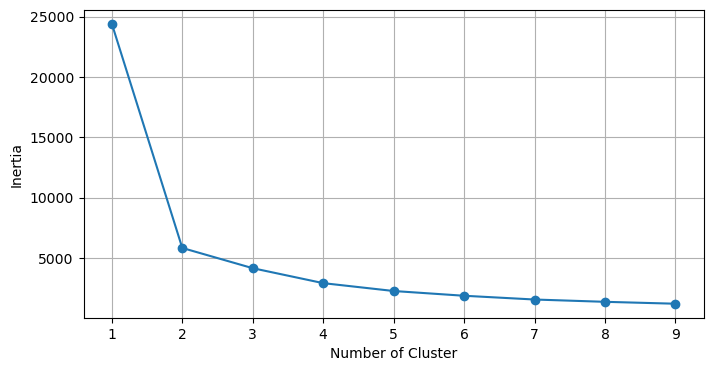

In [8]:
optimize_k_means(df[["RHOB_T", "NPHI_T"]], 10)
## "10" = Maximum number of Clusters
##^ To keep things Simple, we are Running with just 2 variables

^Optimal Number of Clusters: 3, as after this point the Inertia decreases best in a linear fashion

### Applying K-Means Clustering:

In [9]:
kmeans = KMeans(n_clusters = 3)

In [10]:
kmeans.fit(df[["NPHI_T", "RHOB_T"]])

/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [24]:
# Final Inertia for k=3

# Running K-Means without Scaling
kmeans_unscaled = KMeans(n_clusters=3)
kmeans_unscaled.fit(df[["RHOB", "NPHI", "GR", "PEF", "DTC"]])  # Use original, unscaled columns

# Calculating Unscaled Inertia
inertia_unscaled = kmeans_unscaled.inertia_
print(f'Final Inertia without scaling: {inertia_unscaled}')

# Calculating Scaled Inertia
print('Final Inertia AFTER Scaling:', kmeans.inertia_)

## Scaled Inertia is lower; the Scaling has Improved the Clustering by making the Clusters tighter

Final Inertia without scaling: 6395241.7064196905
Final Inertia AFTER Scaling: 4149.3768157713985


/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


We can also assess Inertia values across different numbers of clusters (k) to identify an Optimal number using methods like the Elbow method.

In [11]:
df['kmeans_3'] = kmeans.labels_

In [18]:
from sklearn.metrics import silhouette_score
labels = kmeans.labels_

# The Silhouette Score for k=3 | 3 Clusters
silhouette_score(df[["RHOB_T", "NPHI_T"]], labels)

## 0.59: Indicates the Clusters are fairly well-separated and that points within each Cluster are more similar to
##       each other than to points in other Clusters.

0.5867443186208664

In [29]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531,1
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042,1
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350,1
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297,1
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808,1
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449,0
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891,0
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910,0


In [16]:
# Summary of the Data
df.groupby("kmeans_3")[["RHOB_T", "GR_T", "NPHI_T", "PEF_T", "DTC_T"]].mean()

,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
kmeans_3,,,,,
0,0.898800,0.540985,-0.656355,0.425574,-0.869532
1,-0.640339,0.116855,0.631574,-0.238545,0.661578
2,1.581738,-1.295117,-1.888638,0.459696,-1.718544


In [17]:
# Descripive Statistics for the Data
df.groupby("kmeans_3")[["RHOB_T", "GR_T", "NPHI_T", "PEF_T", "DTC_T"]].describe()

RHOB_T                                                              \
           count      mean       std       min       25%       50%       75%   
kmeans_3                                                                       
0         2524.0  0.898800  0.537760 -0.407959  0.428380  1.019490  1.392640   
1         7910.0 -0.640339  0.458703 -2.609607 -0.854248 -0.558559 -0.379833   
2         1768.0  1.581738  0.240908  0.223599  1.483500  1.638972  1.740090   

                      GR_T            ...     PEF_T             DTC_T  \
               max   count      mean  ...       75%       max   count   
kmeans_3                              ...                               
0         2.939426  2524.0  0.540985  ...  0.770990  5.835369  2524.0   
1         0.673291  7910.0  0.116855  ... -0.143329  7.218123  7910.0   
2         2.504994  1768.0 -1.295117  ...  0.629902  5.093695  1768.0   

                                                                                
              mean       std       min       25%       50%       75%       max  
kmeans_3                                                                        
0        -0.869532  0.430813 -1.920105 -1.113926 -1.042445 -0.753271  0.947898  
1         0.661578  0.350720 -1.974450  0.597477  0.778435  0.861701  1.398372  
2        -1.718544  0.309107 -2.161119 -1.954733 -1.863747 -1.496608 -0.762944  

[3 rows x 40 columns]

In [12]:
# Cluster Sizes
df["kmeans_3"].value_counts()

kmeans_3
0    7908
2    2525
1    1769
Name: count, dtype: int64

In [ ]:
# Cluster Centroids
kmeans.cluster_centers_

### Plotting the Results:

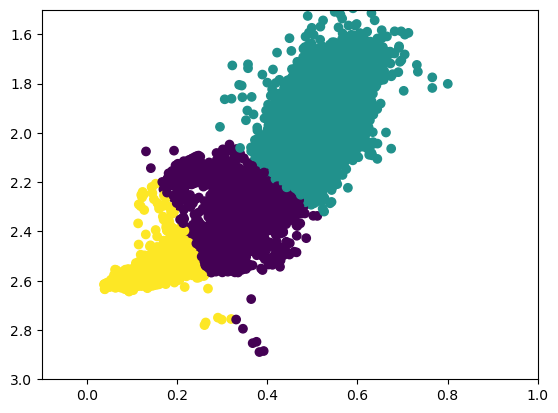

In [30]:
plt.scatter(x=df['NPHI'], y=df['RHOB'], c=df['kmeans_3'])
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.show()

#### How the K-Means Clustering Algorithm Splits the Data up using different K-values:

In [19]:
for k in range(1, 6):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df[["RHOB_T", "NPHI_T"]])
    df[f'KMeans_{k}'] = kmeans.labels_ ## "{k}" Automatically adds a new column to the DataFrame with the Incremental
    ## number of Clusters

/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

In [32]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
DEPTH_MD,,,,,,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531,1,0,0,0,0,1
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042,1,0,0,0,0,1
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350,1,0,0,0,0,1
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297,1,0,0,0,0,1
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449,0,0,1,2,2,0
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891,0,0,1,2,2,0
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910,0,0,1,2,2,0


In [20]:
for k in range(1, 6):
    print(f"Summary for KMeans with {k} clusters:\n")
    
    # Group by the current KMeans column and calculate the mean
    cluster_summary = df.groupby(f'KMeans_{k}')[["RHOB_T", "NPHI_T", "GR_T", "PEF_T", "DTC_T"]].mean()
    
    # Print the mean summary for each cluster
    print(cluster_summary)
    print("\n" + "-"*50 + "\n")  # Separator for readability

Summary for KMeans with 1 clusters:

                RHOB_T        NPHI_T          GR_T         PEF_T         DTC_T
KMeans_1                                                                      
0        -5.516722e-16 -9.754258e-17  2.683752e-16  2.284865e-16 -6.435145e-16

--------------------------------------------------

Summary for KMeans with 2 clusters:

            RHOB_T    NPHI_T      GR_T     PEF_T     DTC_T
KMeans_2                                                  
0        -0.583109  0.591769  0.139305 -0.208218  0.608056
1         1.286332 -1.305437 -0.307305  0.459328 -1.341366

--------------------------------------------------

Summary for KMeans with 3 clusters:

            RHOB_T    NPHI_T      GR_T     PEF_T     DTC_T
KMeans_3                                                  
0         1.581738 -1.888638 -1.295117  0.459696 -1.718544
1        -0.640339  0.631574  0.116855 -0.238545  0.661578
2         0.898800 -0.656355  0.540985  0.425574 -0.869532

--------------

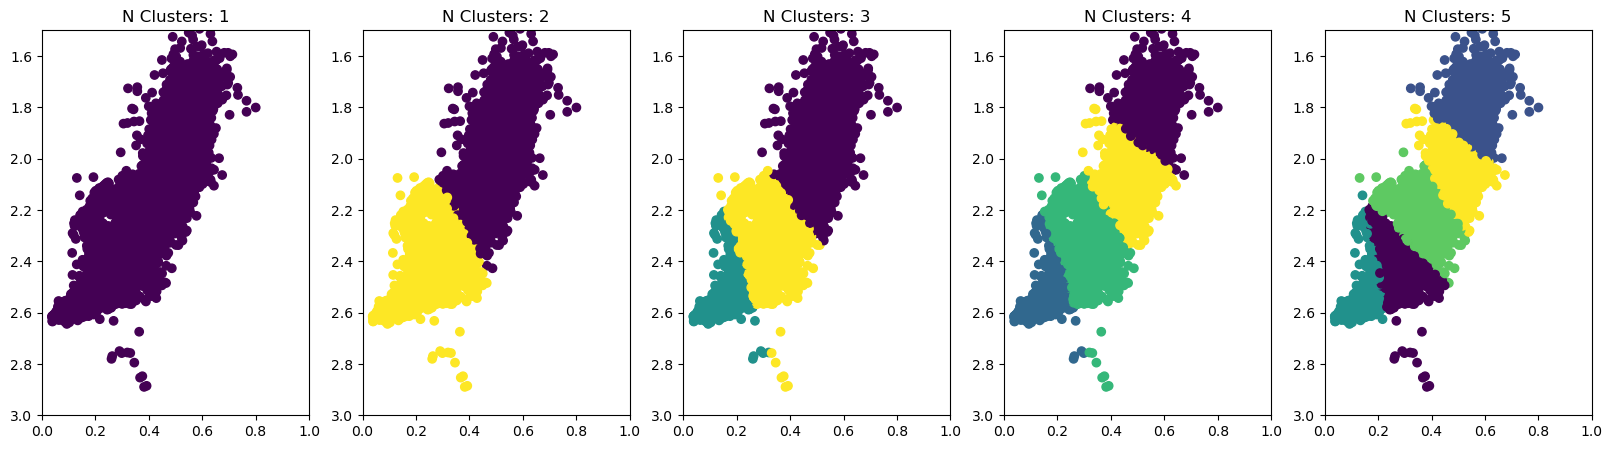

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['NPHI'], y=df['RHOB'], c=df[f'KMeans_{i}'])
    ax.set_ylim(3, 1.5)
    ax.set_xlim(0, 1)
    ax.set_title(f'N Clusters: {i}')